In [2]:
 import numpy as np # linear algebra
 import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 import matplotlib.pyplot as plt # data visualization
 import seaborn as sns # statistical data visualization
 %matplotlib inline

In [8]:
# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\DATA_ANALYTICS\ML\car_evaluation.csv")

In [10]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [14]:
 # view dimensions of dataset
 df.shape

(1727, 7)

In [16]:
 columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
 df.columns = columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [22]:
 #check the frequency counts of categorical variables.
 for col in columns:
     print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [24]:
 df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [26]:
 df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [30]:
X = df.drop(['class'], axis=1)
y = df['class']

In [32]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [34]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

In [38]:
 # split data into training and testing sets
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [40]:
 # check the shape of X_train and X_test
 X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [42]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
 # instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

In [44]:
 # check data types in X_train
 X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [48]:
#Check Categorical variables
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [52]:
 # Step 2: Encode categorical features
 from sklearn.preprocessing import LabelEncoder
 label_encoders = {}
 for col in df.columns:
     le = LabelEncoder()
     df[col] = le.fit_transform(df[col])
     label_encoders[col] = le

In [54]:
 # Features (X) and Target (y)
 X = df.drop("class", axis=1)
 y = df["class"]

In [56]:
 X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [58]:
 # Step 3: Split into training & testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
 # Step 4: Train Random Forest Classifier
 rf = RandomForestClassifier(n_estimators=100, random_state=42)
 rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
 # Step 5: Predictions
 y_pred = rf.predict(X_test)

In [64]:
 # Step 6: Evaluation
 print("Accuracy:", accuracy_score(y_test, y_pred))
 print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9624277456647399

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



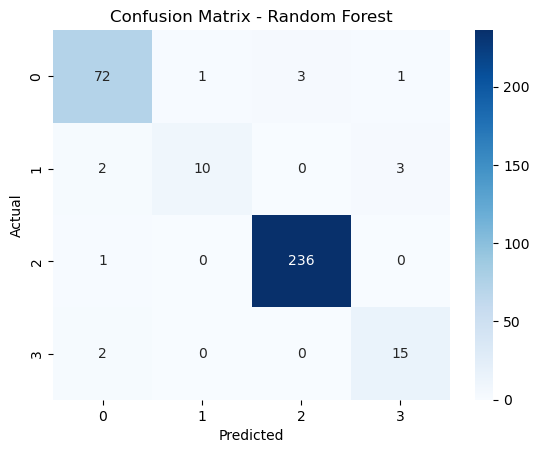

In [68]:
cm = confusion_matrix(y_test, y_pred)

# Get class labels directly from y_test
class_labels = sorted(y_test.unique())

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

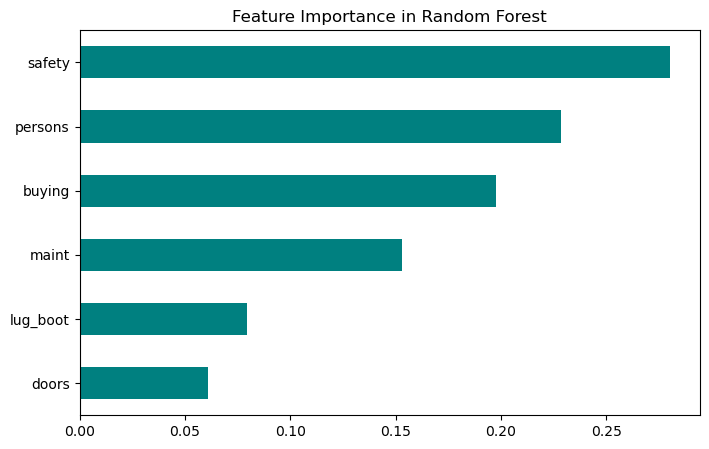

In [70]:
 # Step 7: Feature Importance
 importances = rf.feature_importances_
 feat_importances = pd.Series(importances, index=X.columns)
 feat_importances.sort_values().plot(kind='barh', figsize=(8, 5), color="teal")
 plt.title("Feature Importance in Random Forest")
 plt.show()

In [72]:
 # view the feature scores
 feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
 feature_scores

safety      0.280329
persons     0.228555
buying      0.197642
maint       0.153121
lug_boot    0.079368
doors       0.060984
dtype: float64

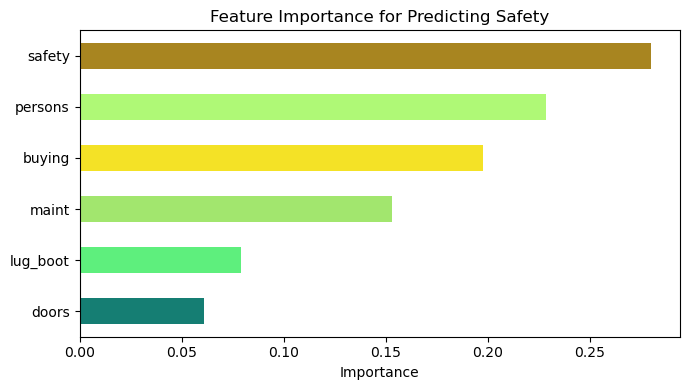

In [74]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values()

# Generate random colors for each bar
colors = np.random.rand(len(feat_imp), 3)

plt.figure(figsize=(7,4))
feat_imp.plot(kind="barh", color=colors)
plt.title("Feature Importance for Predicting Safety")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
 import numpy as np # linear algebra
 import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 import matplotlib.pyplot as plt # data visualization
 import seaborn as sns # statistical data visualization
 %matplotlib inline

# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\DATA_ANALYTICS\ML\car_evaluation.csv")

 # view dimensions of dataset
 df.shape

 columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
 df.columns = columns

df.info()

 #check the frequency counts of categorical variables.
 for col in columns:
     print(df[col].value_counts())

 df['class'].value_counts()

 df.isnull().sum()

X = df.drop(['class'], axis=1)
y = df['class']

X
y

 # split data into training and testing sets
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

 # check the shape of X_train and X_test
 X_train.shape, X_test.shape


 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
 # instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

 # check data types in X_train
 X_train.dtypes

#Check Categorical variables
X_train.head()

 # Step 2: Encode categorical features
 from sklearn.preprocessing import LabelEncoder
 label_encoders = {}
 for col in df.columns:
     le = LabelEncoder()
     df[col] = le.fit_transform(df[col])
     label_encoders[col] = le


 # Features (X) and Target (y)
 X = df.drop("class", axis=1)
 y = df["class"]

X

 # Step 3: Split into training & testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Step 4: Train Random Forest Classifier
 rf = RandomForestClassifier(n_estimators=100, random_state=42)
 rf.fit(X_train, y_train)

 # Step 5: Predictions
 y_pred = rf.predict(X_test)

 # Step 6: Evaluation
 print("Accuracy:", accuracy_score(y_test, y_pred))
 print("\nClassification Report:\n", classification_report(y_test, y_pred))



cm = confusion_matrix(y_test, y_pred)
# Get class labels directly from y_test
class_labels = sorted(y_test.unique())

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


 # Step 7: Feature Importance
 importances = rf.feature_importances_
 feat_importances = pd.Series(importances, index=X.columns)
 feat_importances.sort_values().plot(kind='barh', figsize=(8, 5), color="teal")
 plt.title("Feature Importance in Random Forest")
 plt.show()

 # view the feature scores
 feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
 feature_scores

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values()


# Generate random colors for each bar
colors = np.random.rand(len(feat_imp), 3)
plt.figure(figsize=(7,4))
feat_imp.plot(kind="barh", color=colors)
plt.title("Feature Importance for Predicting Safety")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()